In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm as cm_mlib
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy
%matplotlib inline
plt.viridis()
from matplotlib import animation, rc, colors
from IPython.display import HTML
from brian2.units import *
import matplotlib as mlib
from scipy import stats
from pprint import pprint as pp
from mpl_toolkits.axes_grid1 import make_axes_locatable
# from simulation_statistics.analysis_functions_definitions import *

In [3]:
mlib.rcParams.update({'font.size': 24})
mlib.rcParams.update({'errorbar.capsize': 2})

In [34]:
# data = np.load("D:/Work/Neurogenesis-PhD/simulation_statistics/batch_analysis_141919_21122017.npz")
# metadata = np.load("D:/Work/Neurogenesis-PhD/simulation_statistics/batch_ec0028a3a19c60e1b1ae0c57088d6c0c.npz")
data=np.load("case_1_600k/case_1_600k.npz")
# print data['recording_archive_name']
ff_last = data['final_pre_weights']
lat_last = data['final_post_weights']
init_ff_weights = data['init_ff_connections']
init_lat_weights = data['init_lat_connections']
ff_init = data['init_ff_connections']
lat_init = data['init_lat_connections']
simdata = np.array(data['sim_params']).ravel()[0]
grid = simdata['grid']
N_layer = grid[0] * grid[1]
n = int(np.sqrt(N_layer))
g_max = simdata['g_max']
s_max = simdata['s_max']
sigma_form_forward = simdata['sigma_form_forward']
sigma_form_lateral = simdata['sigma_form_lateral']
p_form_lateral = simdata['p_form_lateral']
p_form_forward = simdata['p_form_forward']
p_elim_dep = simdata['p_elim_dep']
p_elim_pot = simdata['p_elim_pot']
f_rew = simdata['f_rew']

In [35]:
# LAT connection bar chart
last_conn, last_weight = list_to_post_pre(ff_last, lat_last,
                                                  s_max, N_layer)
init_conn, init_weight = list_to_post_pre(ff_init, lat_init,
                                          s_max, N_layer)

init_fan_in_rec = fan_in(init_conn, init_weight, 'conn', 'rec')

mean_projection_rec, means_and_std_devs_rec, \
means_for_plot_rec, mean_centred_projection_rec = centre_weights(
    init_fan_in_rec, 16)

init_fan_in_rec_rad = radial_sample(mean_projection_rec, 100)

final_fan_in_rec = fan_in(last_conn, last_weight, 'weight',
                          'rec')

final_mean_projection_rec, final_means_and_std_devs_rec, \
final_means_for_plot_rec, final_mean_centred_projection_rec = centre_weights(
    final_fan_in_rec, 16)

final_fan_in_rec_rad = \
    radial_sample(final_mean_projection_rec, 100)

final_fan_in_rec_conn = fan_in(last_conn, last_weight, 'conn',
                               'rec')

final_mean_projection_rec_conn, final_means_and_std_devs_rec_conn, \
final_means_for_plot_rec_conn, final_mean_centred_projection_rec_conn = centre_weights(
    final_fan_in_rec_conn, 16)

final_fan_in_rec_rad_conn = \
    radial_sample(final_mean_projection_rec_conn, 100)

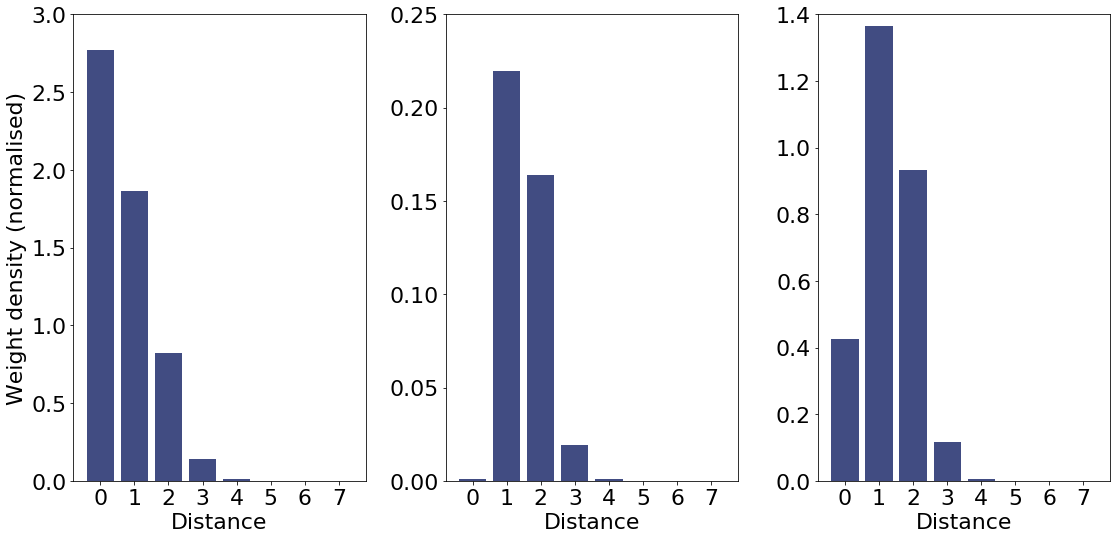

In [38]:
plt.figure(figsize=(16, 8), dpi=800)
plt.subplot(1, 3, 1)
# plt.suptitle("Distance between input and target neurons for lateral connections")
plt.bar(range(8), init_fan_in_rec_rad, color='#414C82')
plt.ylim([0, 3.])
# plt.ylim([0, 3])
plt.xticks(range(8))
plt.xlabel("Distance")
plt.ylabel("Weight density (normalised)")
plt.subplot(1, 3, 2)
plt.xticks(range(8))
plt.ylim([0, .25])
plt.bar(range(8), final_fan_in_rec_rad, color='#414C82')
plt.xlabel("Distance")
plt.subplot(1, 3, 3)
plt.xticks(range(8))
plt.bar(range(8), final_fan_in_rec_rad_conn, color='#414C82')
plt.xlabel("Distance")
plt.ylim([0, 1.4])
plt.tight_layout()

plt.savefig("lateral_weight_density.png")

In [5]:
def distance(x0, x1, grid=np.asarray([16, 16]), type='euclidian'):
    x0 = np.asarray(x0)
    x1 = np.asarray(x1)
    delta = np.abs(x0 - x1)
    delta = np.where(delta > grid * .5, delta - grid, delta)

    if type == 'manhattan':
        return np.abs(delta).sum(axis=-1)
    return np.sqrt((delta ** 2).sum(axis=-1))
def index_to_dist(i1, i2, grid):
    return distance((i1//grid[0], i1%grid[1]),(i2//grid[0], i2%grid[1]), grid=grid, type='euclidian')

In [9]:
# data = np.load("C:/Work/phd/synaptogenesis/e242f69a4e27d7e68115466749a63566/case3_run1_@e242f69a4e27d7e68115466749a63566.npz")
data = np.load("C:/Work/phd/synaptogenesis/e242f69a4e27d7e68115466749a63566/case1_run1_@e242f69a4e27d7e68115466749a63566.npz")
# data = np.load("C:/Work/phd/synaptogenesis/e242f69a4e27d7e68115466749a63566/case2_run1_@e242f69a4e27d7e68115466749a63566.npz")
# data = np.load("C:/Work/phd/synaptogenesis/case_2_or_checks.npz")
# data = np.load("C:/Work/phd/synaptogenesis/case_3_forever.npz")

simdata = np.array(data['sim_params']).ravel()[0]
grid = simdata['grid']
pp(simdata)


{'a_minus': 0.0375,
 'a_plus': 0.1,
 'b': 1.2,
 'case': 1,
 'cell_params': {'cm': 20.0,
                 'e_rev_E': 0.0,
                 'e_rev_I': -80.0,
                 'i_offset': 0.0,
                 'tau_m': 20.0,
                 'tau_refrac': 5.0,
                 'tau_syn_E': 5.0,
                 'tau_syn_I': 5.0,
                 'v_reset': -70.0,
                 'v_rest': -70.0,
                 'v_thresh': -50.0},
 'delay': 1,
 'f_base': 5,
 'f_peak': 152.8,
 'f_rew': 10000,
 'g_max': 0.2,
 'gaussian_input': True,
 'grid': array([16, 16], dtype=int64),
 'insult': False,
 'lateral_inhibition': 0,
 'p_elim_dep': 0.0245,
 'p_elim_pot': 0.00013600000000000003,
 'p_form_forward': 0.16,
 'p_form_lateral': 1,
 'random_partner': False,
 's_max': 16,
 'sigma_form_forward': 2.5,
 'sigma_form_lateral': 1,
 'sigma_stim': 2,
 'simtime': 300000,
 't_minus': 64,
 't_plus': 20.0,
 't_record': 30000,
 't_stim': 20,
 'tau_refrac': 5.0}


In [5]:
data.files

['sim_params',
 'total_time',
 'init_lat_connections',
 'post_spikes',
 'final_pre_weights',
 'init_ff_connections',
 'lat_connections',
 'insult',
 'ff_connections',
 'exception',
 'pre_spikes',
 'mean_firing_rate',
 'final_post_weights',
 'simtime']

In [6]:
ff_connections = data['ff_connections'][0]
lat_connections = data['lat_connections'][0]
print ff_connections.shape
print lat_connections.shape
init_ff_connections = data['init_ff_connections']
print init_ff_connections.shape
N_layer = grid[0] * grid[1]

(3696L, 4L)
(3406L, 4L)
(4096L, 4L)


In [7]:
final_ff_conn_network = np.ones((N_layer, N_layer)) * np.nan
final_lat_conn_network = np.ones((N_layer, N_layer)) * np.nan
init_ff_conn_network = np.ones((N_layer, N_layer)) * np.nan

ff_num_network = np.zeros((N_layer, N_layer))
lat_num_network = np.zeros((N_layer, N_layer))

init_ff_num_network = np.zeros((N_layer, N_layer))
for source, target, weight, delay in ff_connections:
    if np.isnan(final_ff_conn_network[int(source), int(target)]):
        final_ff_conn_network[int(source), int(target)] = weight
    else:
        final_ff_conn_network[int(source), int(target)] += weight
    ff_num_network[int(source), int(target)] += 1
    assert delay == 1

for source, target, weight, delay in lat_connections:
    if np.isnan(final_lat_conn_network[int(source), int(target)]):
        final_lat_conn_network[int(source), int(target)] = weight
    else:
        final_lat_conn_network[int(source), int(target)] += weight
    lat_num_network[int(source), int(target)] += 1
    assert delay == 1

for source, target, weight, delay in init_ff_connections:
    if np.isnan(init_ff_conn_network[int(source), int(target)]):
        init_ff_conn_network[int(source), int(target)] = weight
    else:
        init_ff_conn_network[int(source), int(target)] += weight
    init_ff_num_network[int(source), int(target)] += 1
    assert delay == 1

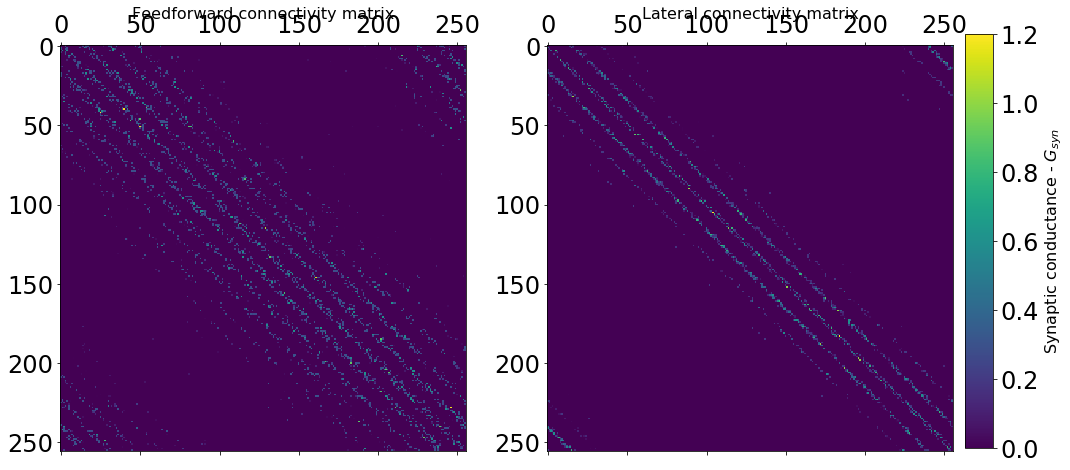

In [8]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), dpi=800)
i = ax1.matshow(np.nan_to_num(final_ff_conn_network))
i2 = ax2.matshow(np.nan_to_num(final_lat_conn_network))
ax1.grid(visible=False)
ax1.set_title("Feedforward connectivity matrix", fontsize=16)
ax2.set_title("Lateral connectivity matrix", fontsize=16)
cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])
cbar = f.colorbar(i2, cax=cbar_ax)
cbar.set_label("Synaptic conductance - $G_{syn}$", fontsize=16)
plt.show()

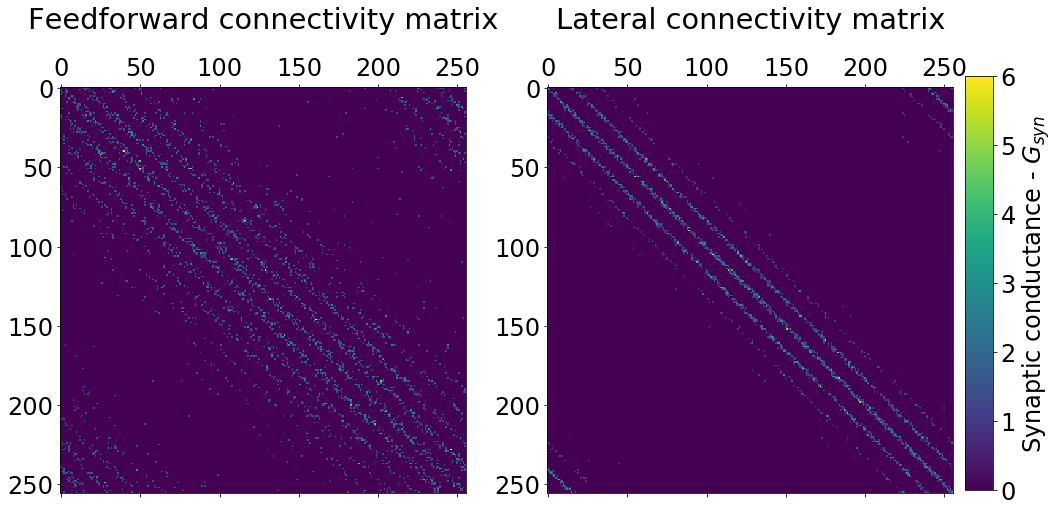

In [9]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), dpi=800)
i = ax1.matshow(ff_num_network)
i2 = ax2.matshow(lat_num_network)
ax1.grid(visible=False)
ax1.set_title("Feedforward connectivity matrix\n")
ax2.set_title("Lateral connectivity matrix\n")
cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])
cbar = f.colorbar(i2, cax=cbar_ax)
cbar.set_label("Synaptic conductance - $G_{syn}$")
plt.show()

In [10]:
final_ff_conn_field = np.ones(256) * 0
final_lat_conn_field = np.ones(256) * 0


for row in range(final_ff_conn_network.shape[0]):
    final_ff_conn_field += np.roll(np.nan_to_num(final_ff_conn_network[row, :]), (256//2 + 8) - row)
    final_lat_conn_field += np.roll(np.nan_to_num(final_lat_conn_network[row, :]), (256//2 + 8) - row)
    
final_ff_num_field = np.ones(256) * 0
final_lat_num_field = np.ones(256) * 0


for row in range(ff_num_network.shape[0]):
    final_ff_num_field += np.roll(np.nan_to_num(ff_num_network[row, :]), (256//2 + 8) - row)
    final_lat_num_field += np.roll(np.nan_to_num(lat_num_network[row, :]), (256//2 + 8) - row)
    
    
init_ff_conn_field = np.ones(256) * 0
init_ff_num_field = np.ones(256) * 0
for row in range(final_ff_conn_network.shape[0]):
    init_ff_conn_field += np.roll(np.nan_to_num(init_ff_conn_network[row, :]), (256//2 + 8) - row)
    init_ff_num_field += np.roll(np.nan_to_num(init_ff_num_network[row, :]), (256//2 + 8) - row)

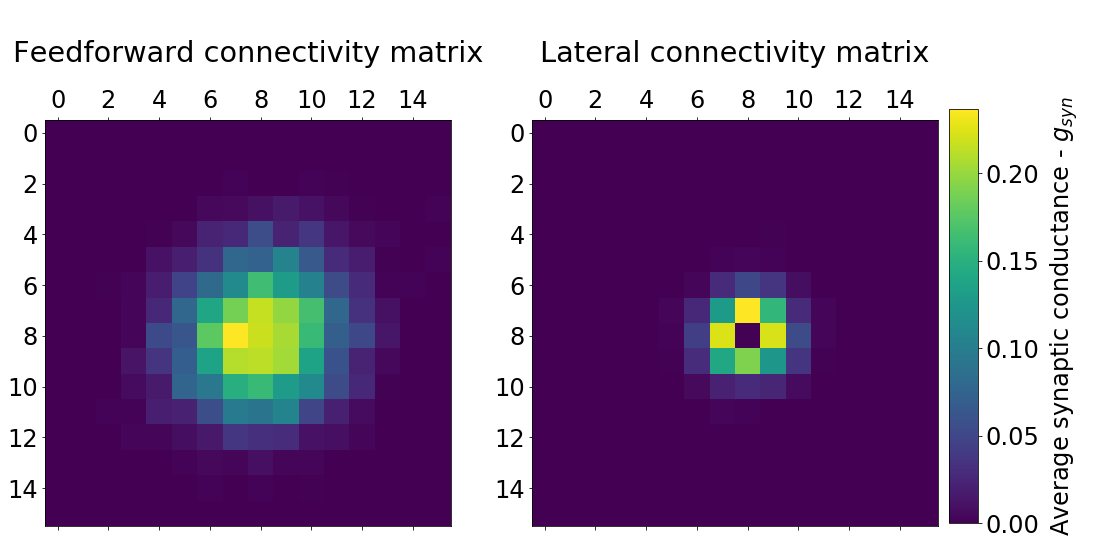

In [11]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), dpi=800)
i = ax1.matshow(final_ff_conn_field.reshape(16,16)/256)
i2 = ax2.matshow(final_lat_conn_field.reshape(16,16)/256)
ax1.grid(visible=False)
ax1.set_title("\nFeedforward connectivity matrix\n")
ax2.set_title("\nLateral connectivity matrix\n")
cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])
cbar = f.colorbar(i2, cax=cbar_ax)

norm = colors.Normalize(vmin=np.min([final_ff_conn_field, final_lat_conn_field]), 
                        vmax=np.max([final_ff_conn_field, final_lat_conn_field]))
cbar.set_label("Average synaptic conductance - $g_{syn}$\n")
plt.show()

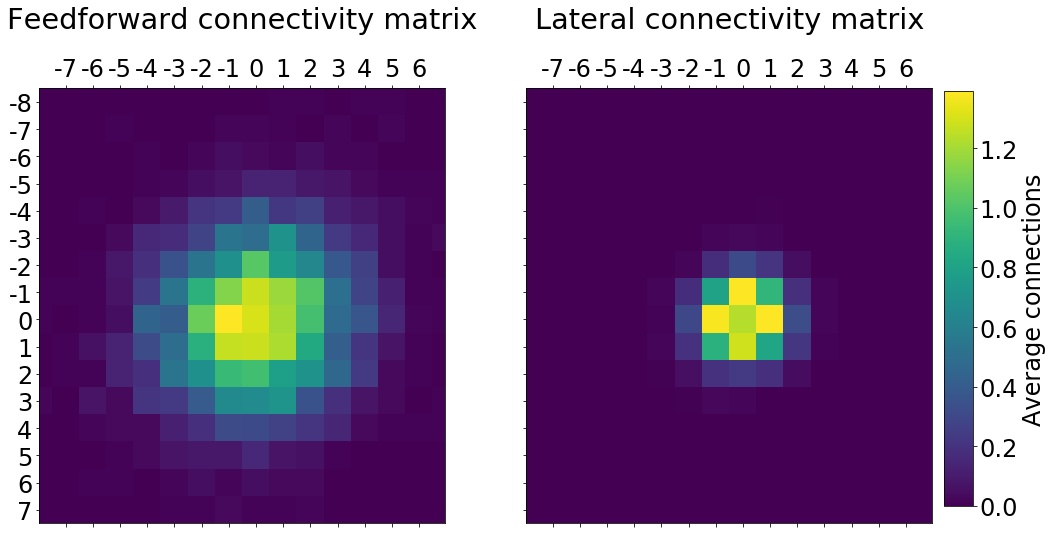

In [12]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), dpi=800, sharey=True)
i = ax1.matshow(final_ff_num_field.reshape(16,16)/256)
i2 = ax2.matshow(final_lat_num_field.reshape(16,16)/256)
ax1.grid(visible=False)
ax1.set_title("Feedforward connectivity matrix\n")
ax2.set_title("Lateral connectivity matrix\n")
cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])

ax1.set_xticklabels(np.arange(16) - 8)
ax1.set_xticks(np.arange(16))


ax2.set_xticklabels(np.arange(16) - 8)
ax2.set_xticks(np.arange(16))


ax1.set_yticklabels(np.arange(16) - 8)
ax1.set_yticks(np.arange(16))

norm = colors.Normalize(vmin=np.min([final_ff_num_field, final_lat_num_field])/256*.2, 
                        vmax=np.max([final_ff_num_field, final_lat_num_field])/256*.2)

cbar = f.colorbar(i2, cax=cbar_ax)
cbar.set_label("Average connections")
plt.show()

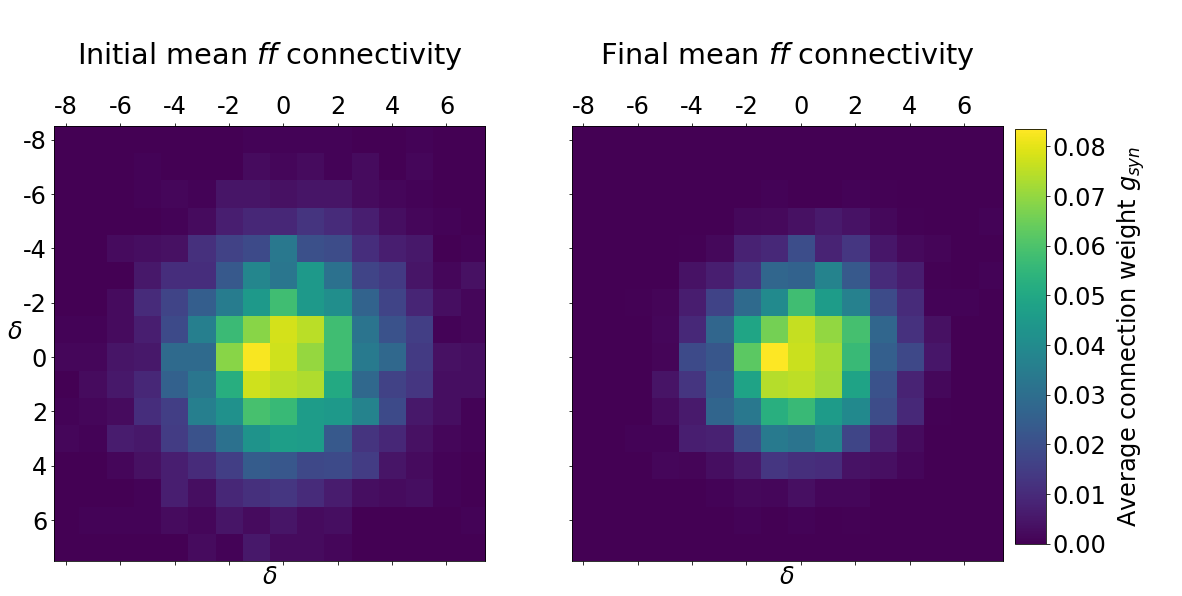

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 8), dpi=800, sharey=True)

minimus = np.min([init_ff_conn_field/256, final_ff_conn_field/256])
maximus = np.max([init_ff_conn_field/256, final_ff_conn_field/256])

norm = colors.Normalize(vmin=minimus, 
                        vmax=maximus)

i = ax1.matshow(init_ff_conn_field.reshape(16,16)/256,vmin=minimus, 
                        vmax=maximus)
i2 = ax2.matshow(final_ff_conn_field.reshape(16,16)/256,vmin=minimus, 
                        vmax=maximus)
ax1.grid(visible=False)
ax1.set_title("\nInitial mean $ff$ connectivity\n")
ax2.set_title("\nFinal mean $ff$ connectivity\n")
cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])



ax1.set_xlabel(r"$\delta$")
ax1.set_ylabel(r"$\delta$  ", rotation=0)
ax2.set_xlabel(r"$\delta$")


ax2.set_xticklabels((np.arange(16) - 8)[::2])
ax2.set_xticks(np.arange(16)[::2])

ax1.set_yticklabels((np.arange(16) - 8)[::2])
ax1.set_yticks(np.arange(16)[::2])

ax1.set_xticklabels((np.arange(16) - 8)[::2])
ax1.set_xticks(np.arange(16)[::2])


cbar = f.colorbar(i2, cax=cbar_ax)
cbar.set_label("Average connection weight $g_{syn}$\n")

plt.savefig("final_ff_conn_comparison.png", dpi=800, bbox_inches='tight', pad_inches=0)
plt.show()

In [14]:
maximus

0.083539962768554688

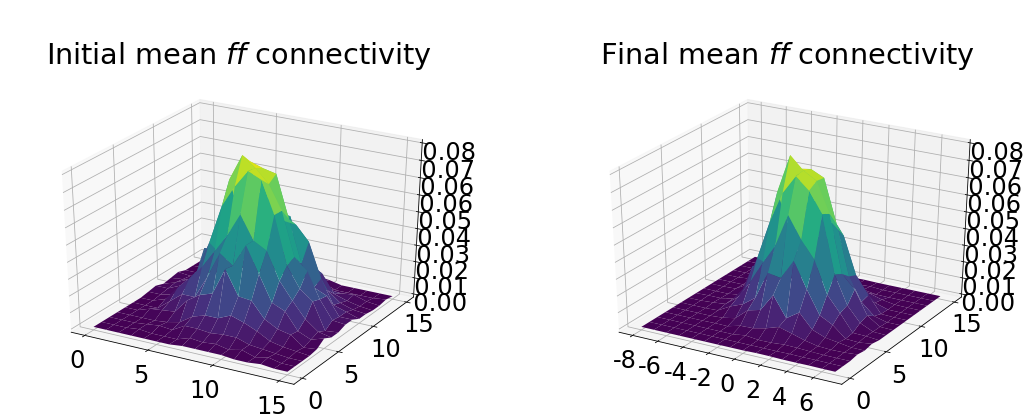

In [15]:
fig = plt.figure(figsize=(18, 6), dpi=800)
ax = fig.add_subplot(1, 2, 1, projection='3d')
# ax = fig.gca(projection='3d')
minimus = np.min([init_ff_conn_field/256, final_ff_conn_field/256])
maximus = np.max([init_ff_conn_field/256, final_ff_conn_field/256])

norm = colors.Normalize(vmin=minimus, 
                        vmax=maximus)

init_weigts = init_ff_conn_field.reshape(16,16)/256
# Plot the surface.
X, Y = np.meshgrid(np.arange(init_weigts.shape[0]), np.arange(init_weigts.shape[0]))



surf = ax.plot_surface(X, Y, init_weigts, cmap=cm_mlib.viridis,
                       linewidth=0, antialiased=True,vmin=minimus, 
                        vmax=maximus)

ax.set_title("\nInitial mean $ff$ connectivity\n")

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
# ax2 = fig.gca(projection='3d')

final_weights = final_ff_conn_field.reshape(16,16)/256
X, Y = np.meshgrid(np.arange(final_weights.shape[0]), np.arange(final_weights.shape[0]))


surf2 = ax2.plot_surface(X, Y, final_weights, cmap=cm_mlib.viridis,
                       linewidth=0, antialiased=True,vmin=minimus, 
                        vmax=maximus)
ax2.set_title("\nFinal mean $ff$ connectivity\n")
# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
# ax.xaxis.set_major_locator(LinearLocator(8))
# ax.yaxis.set_major_locator(LinearLocator(8))
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('  %.2f'))

# ax2.xaxis.set_major_locator(LinearLocator())
# ax2.yaxis.set_major_locator(LinearLocator(8))
ax2.zaxis.set_major_locator(LinearLocator(10))
ax2.zaxis.set_major_formatter(FormatStrFormatter('  %.2f'))

ax2.set_xticklabels((np.arange(16) - 8)[::2])
ax2.set_xticks(np.arange(16)[::2])

ax1.set_yticklabels((np.arange(16) - 8)[::2])
ax1.set_yticks(np.arange(16)[::2])

ax1.set_xticklabels((np.arange(16) - 8)[::2])
ax1.set_xticks(np.arange(16)[::2])



plt.savefig("3d_final_ff_conn_comparison.png", dpi=800, bbox_inches='tight', pad_inches=2)
plt.show()

WARNING    C:\WinPython-64bit-2.7.9.4\python-2.7.9.amd64\lib\site-packages\IPython\kernel\__main__.py:4: RuntimeWarning: invalid value encountered in divide
 [py.warnings]

WARNING    C:\WinPython-64bit-2.7.9.4\python-2.7.9.amd64\lib\site-packages\IPython\kernel\__main__.py:5: RuntimeWarning: invalid value encountered in divide
 [py.warnings]

WARNING    C:\WinPython-64bit-2.7.9.4\python-2.7.9.amd64\lib\site-packages\IPython\kernel\__main__.py:26: RuntimeWarning: invalid value encountered in divide
 [py.warnings]

WARNING    C:\WinPython-64bit-2.7.9.4\python-2.7.9.amd64\lib\site-packages\IPython\kernel\__main__.py:27: RuntimeWarning: invalid value encountered in divide
 [py.warnings]



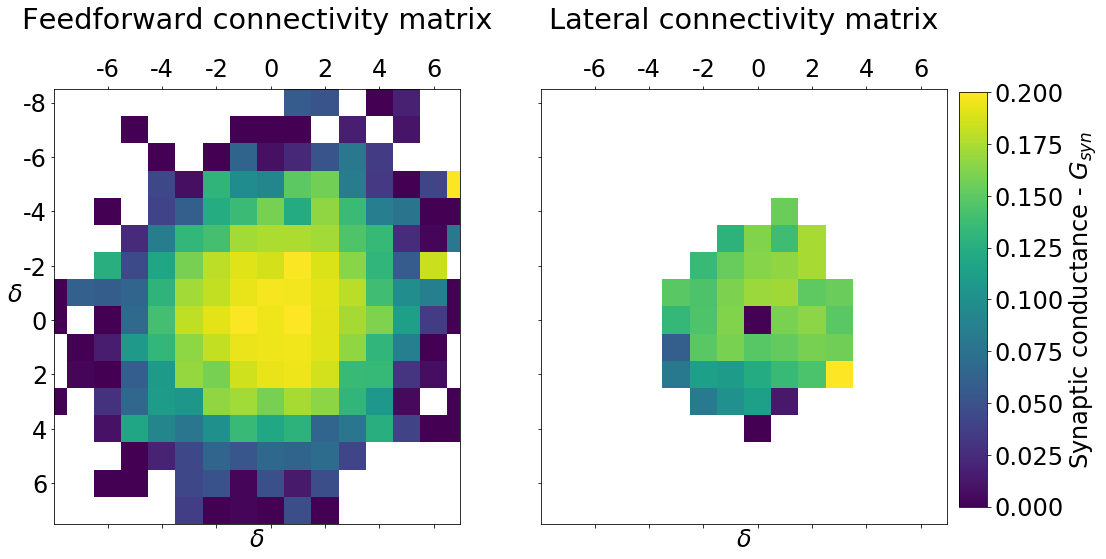

In [16]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), dpi=800, sharey=True)


i = ax1.matshow((final_ff_conn_field/final_ff_num_field).reshape(16,16))
i2 = ax2.matshow((final_lat_conn_field/final_lat_num_field).reshape(16,16))
ax1.grid(visible=False)
ax1.set_title("Feedforward connectivity matrix\n")
ax2.set_title("Lateral connectivity matrix\n")
cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])


ax1.set_xlabel(r"$\delta$")
ax1.set_ylabel(r"$\delta$  ", rotation=0)
ax2.set_xlabel(r"$\delta$")


ax2.set_xticklabels((np.arange(16) - 8)[::2])
ax2.set_xticks(np.arange(16)[::2])

ax1.set_yticklabels((np.arange(16) - 8)[::2])
ax1.set_yticks(np.arange(16)[::2])

ax1.set_xticklabels((np.arange(16) - 8)[::2])
ax1.set_xticks(np.arange(16)[::2])

norm = colors.Normalize(vmin=np.min([(final_ff_conn_field/final_ff_num_field), (final_lat_conn_field/final_lat_num_field)])/256, 
                        vmax=np.max([(final_ff_conn_field/final_ff_num_field), (final_lat_conn_field/final_lat_num_field)])/256)

cbar = f.colorbar(i2, cax=cbar_ax)
cbar.set_label("Synaptic conductance - $G_{syn}$")

plt.savefig("ff_lat_weight_over_conn.png", dpi=800, bbox_inches='tight', pad_inches=0)

plt.show()

In [17]:
np.isfinite(final_ff_conn_network)

array([[False, False, False, ..., False, False,  True],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False,  True],
       ..., 
       [False, False, False, ...,  True, False, False],
       [False, False, False, ...,  True, False, False],
       [False, False,  True, ..., False, False, False]], dtype=bool)